## Part 1 - Ford GoBike System Data


## by Taiwo Adelanwa

## Introduction

    The Ford GoBike system dataset provides anonymized, timestamped data about the start- and end- station for a bike, the user type (subscriber or casual rider), as well as some customer-reported attributes like birth year and gender. This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

    This notebook explores and documents the exploratory process of the Ford GoBike data.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
from datetime import time

import mpu  # package to calculate distance

%matplotlib inline

In [2]:
# load Dataset
bikes = pd.read_csv('Bike.data.csv')

In [3]:
# Define function to convert columns to category
def to_category(df, cols):
    """Convert selected columns to 'category'. Takes dataframe name and list of columns as inputs"""
    for col in cols:
        df[col] = df[col].astype('category')

# Convert the columns to category
cate = ['start_station_id', 'end_station_id', 'user_type', 'member_gender', 'bike_share_for_all_trip']
to_category(bikes, cate)

# Convert bike_id to string
bikes['bike_id'] = bikes.bike_id.astype(str)

In [4]:
# Calculate distance of ride in Kilometers
bikes['distance'] = bikes.apply(lambda x: mpu.haversine_distance((x.start_station_latitude, x.start_station_longitude),
                                                               (x.end_station_latitude, x.end_station_longitude)), axis=1)

# Calculate the users age in 2019
bikes['age'] = 2019 - bikes.member_birth_year

# Create age groups
bin = [15, 25, 46, 65, 200]
label = ["Adolescent", "Middle-aged Adult", "Old-aged Adult", "Seniors"]
bikes["age_group"] = pd.cut(bikes["age"], bins=bin, labels=label, right=False)

In [5]:
bikes['end_time'] = pd.to_datetime(bikes['end_time'])

In [6]:
# Create column 'start day' 
bikes['start'] = bikes['start_time'].apply(lambda x: x.split(' ')[0])
bikes['start_day'] = bikes['start'].apply(lambda x: x.split('-')[2])

In [7]:
bikes.drop(['start'],axis=1,inplace=True)

In [8]:
# Replace 'start_day' with day of the week
bikes['start_day'].replace('01','Friday',inplace=True)
bikes['start_day'].replace('02','Saturday',inplace=True)
bikes['start_day'].replace('03','Sunday',inplace=True)
bikes['start_day'].replace('04','Monday',inplace=True)
bikes['start_day'].replace('05','Tuesday',inplace=True)
bikes['start_day'].replace('06','Wednesday',inplace=True)
bikes['start_day'].replace('07','Thursday',inplace=True)
bikes['start_day'].replace('08','Friday',inplace=True)
bikes['start_day'].replace('09','Saturday',inplace=True)
bikes['start_day'].replace('10','Sunday',inplace=True)
bikes['start_day'].replace('11','Monday',inplace=True)
bikes['start_day'].replace('12','Tuesday',inplace=True)
bikes['start_day'].replace('13','Wednesday',inplace=True)
bikes['start_day'].replace('14','Thursday',inplace=True)
bikes['start_day'].replace('15','Friday',inplace=True)
bikes['start_day'].replace('16','Saturday',inplace=True)
bikes['start_day'].replace('17','Sunday',inplace=True)
bikes['start_day'].replace('18','Monday',inplace=True)
bikes['start_day'].replace('19','Tuesday',inplace=True)
bikes['start_day'].replace('20','Wednesday',inplace=True)
bikes['start_day'].replace('21','Thursday',inplace=True)
bikes['start_day'].replace('22','Friday',inplace=True)
bikes['start_day'].replace('23','Saturday',inplace=True)
bikes['start_day'].replace('24','Sunday',inplace=True)
bikes['start_day'].replace('25','Monday',inplace=True)
bikes['start_day'].replace('26','Tuesday',inplace=True)
bikes['start_day'].replace('27','Wednesday',inplace=True)
bikes['start_day'].replace('28','Thursday',inplace=True)

In [9]:
bikes['start_day'] = bikes['start_day'].astype('category')

In [10]:
# Create column 'start time'
bikes['start_time'] = bikes['start_time'].apply(lambda x: x.split(' ')[1])
bikes['start_time'] = bikes['start_time'].apply(lambda x: x.split(':')[0])

In [11]:
# Change to 12hr Time
bikes['start_time'].replace('00','12am',inplace=True)
bikes['start_time'].replace('01','1am',inplace=True)
bikes['start_time'].replace('02','2am',inplace=True)
bikes['start_time'].replace('03','3am',inplace=True)
bikes['start_time'].replace('04','4am',inplace=True)
bikes['start_time'].replace('05','5am',inplace=True)
bikes['start_time'].replace('06','6am',inplace=True)
bikes['start_time'].replace('07','7am',inplace=True)
bikes['start_time'].replace('08','8am',inplace=True)
bikes['start_time'].replace('09','9am',inplace=True)
bikes['start_time'].replace('10','10am',inplace=True)
bikes['start_time'].replace('11','11am',inplace=True)
bikes['start_time'].replace('12','12pm',inplace=True)
bikes['start_time'].replace('13','1pm',inplace=True)
bikes['start_time'].replace('14','2pm',inplace=True)
bikes['start_time'].replace('15','3pm',inplace=True)
bikes['start_time'].replace('16','4pm',inplace=True)
bikes['start_time'].replace('17','5pm',inplace=True)
bikes['start_time'].replace('18','6pm',inplace=True)
bikes['start_time'].replace('19','7pm',inplace=True)
bikes['start_time'].replace('20','8pm',inplace=True)
bikes['start_time'].replace('21','9pm',inplace=True)
bikes['start_time'].replace('22','10pm',inplace=True)
bikes['start_time'].replace('23','11pm',inplace=True)

In [12]:
bikes.head(6)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,age,age_group,start_day
0,52185,5pm,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,0.544709,35.0,Middle-aged Adult,Thursday
1,42521,6pm,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,1.742999,NaN,NaN,Thursday
2,61854,12pm,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2.704545,47.0,Old-aged Adult,Thursday
3,36490,5pm,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,0.260739,30.0,Middle-aged Adult,Thursday
4,1585,11pm,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2.409301,45.0,Middle-aged Adult,Thursday
5,1793,11pm,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,3.332203,60.0,Old-aged Adult,Thursday


In [13]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  object        
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  category      
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  category      
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [14]:
bikes.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,distance,age
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000,175147.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,1984.806437,1.690659,34.193563
std,1794.389780,0.099581,0.117097,0.099490,0.116673,10.116689,1.097589,10.116689
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,0.000000,18.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,1980.000000,0.910955,27.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1987.000000,1.430738,32.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,1992.000000,2.225687,39.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,69.469241,141.000000


In [15]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
time_order = ['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am',
               '12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm']

## What is the structure of your dataset?

There are 183,412 distinct Go-ride listings with 20 features contained in the dataset. There are 8 numerical features but 2 (start_station_id, end_station_id) are categorical. There are 4 features with the latitude and longitudes of the start and end stations. The distance of the ride has been calculated. Also, the time of day and day of the week have been generated from the data.

## What is/are the main feature(s) of interest in your dataset?

I am most interested in finding out features that help determine when most trips take place in terms of time of day, day of the week. When most trips take place. The average duration of trips taken? Does the above depend on if a user is a subscriber or customer? Which gender is more interested in bike trips.

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I would expect that the time of the day and day of the week will be a huge factor on when most trips would take place. It is expected that there will be more trips during  weekends compared to weekdays. In addition, users' age will likely influence the ride and length or distance covered.

## Univariate Exploration
    In this section, I will begin by exploring the distribution of important variables.

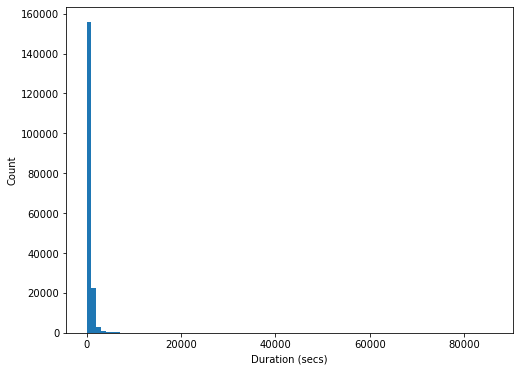

In [16]:
plt.figure(figsize=(8, 6))
bin_size = 1000
bin = np.arange(0, bikes['duration_sec'].max()+bin_size, bin_size)
plt.hist(data=bikes, x='duration_sec', bins= bin)
plt.xlabel('Duration (secs)')
plt.ylabel('Count');

The duration of rides in seconds is right-skewed and has a long tail with very few high values on the right hand side of the  
histogram. Let's check with log tranformation of 'duration_sec' to see a more precise plot.

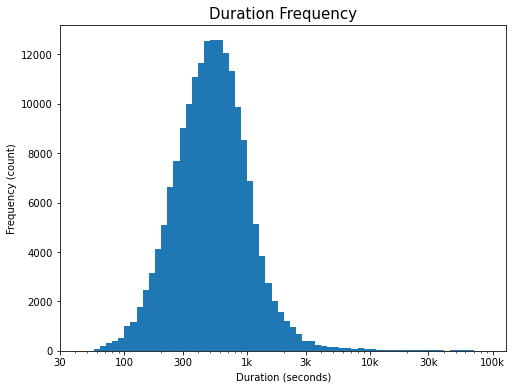

In [17]:
plt.figure(figsize=(8, 6))
bin_size = 0.05
bin= 10 ** np.arange(1.7, np.log10(bikes['duration_sec'].max())+bin_size, bin_size)
plt.hist(data=bikes, x='duration_sec', bins=bin)
plt.xscale('log')
plt.xticks([3e1, 1e2, 3e2, 1e3, 3e3, 1e4, 3e4, 1e5], [ '30', '100', '300', '1k', '3k', '10k', '30k', '100k'])
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency (count)')
plt.title('Duration Frequency',fontsize=15);

The plot shows a unimodal normal distribution with its peak value around 500 to 800 seconds per ride with a frequency of more than 12,000. The duration distribution still shows a right skew.

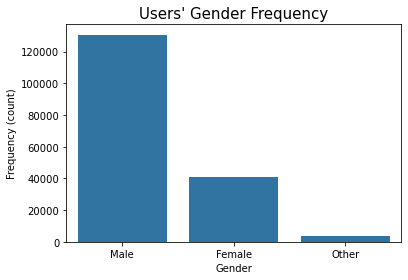

In [18]:
type_count = bikes['member_gender'].value_counts()
type_order = type_count.index
base_color = sb.color_palette()[0]
sb.countplot(data = bikes, x = 'member_gender', color = base_color, order = type_order)
plt.xlabel('Gender')
plt.ylabel('Frequency (count)')
plt.title('Users\' Gender Frequency', fontsize=15)
plt.show()

This plot show that most riders are male with males accounting for over 120,000 rides more than double the value for females. This implies that Male demography took more bike trips than the rest.

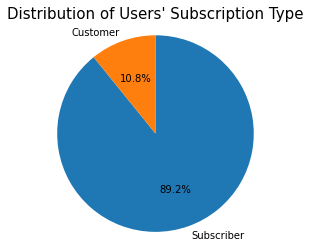

In [19]:
sorted_counts = bikes['user_type'].value_counts()

plt.pie(sorted_counts,autopct="%.1f%%", labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square')
plt.title('Distribution of Users\' Subscription Type', fontsize=15)
plt.show()

This plot shows 89.2% of rides were from subscribers, while just 10.8% were customers paying daily.

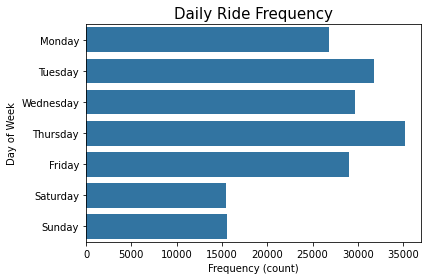

In [20]:
base_color = sb.color_palette()[0]
sb.countplot(data = bikes, y = 'start_day', color = base_color, order = day_order)
plt.xlabel('Frequency (count)')
plt.ylabel('Day of Week')
plt.title('Daily Ride Frequency', fontsize=15)
plt.show()

Interestingly, as against expectations, Saturdays and Sundays which are weekends have the least rides originating during the period. Most rides occurred on Thursdays followed by Tuesdays with both having above 30,000 rides.

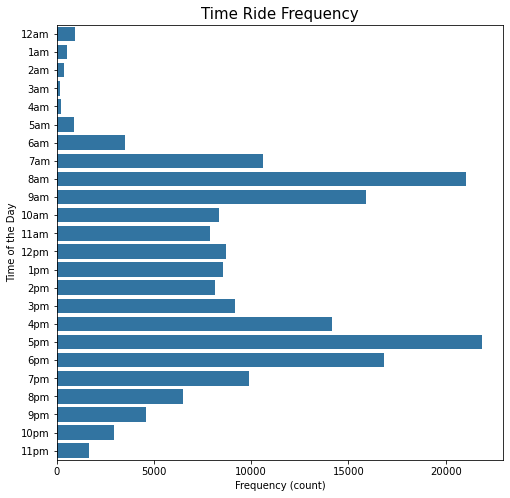

In [21]:
plt.figure(figsize = [8,8])
base_color = sb.color_palette()[0]
sb.countplot(data = bikes, y = 'start_time', color = base_color , order = time_order)
plt.xlabel('Frequency (count)')
plt.ylabel('Time of the Day')
plt.title('Time Ride Frequency', fontsize=15)
plt.show()

Expectedly, most rides occurred at 8am and 5pm  when the weather is expected to be cooler and conducive for relaxation and riding. The least record of rides were from 12am to 5am.

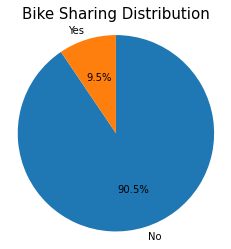

In [22]:
sorted_counts = bikes['bike_share_for_all_trip'].value_counts()

plt.pie(sorted_counts, autopct="%.1f%%", labels = sorted_counts.index, startangle = 90,
        counterclock = False)
plt.title('Bike Sharing Distribution', fontsize=15)
plt.axis('square');

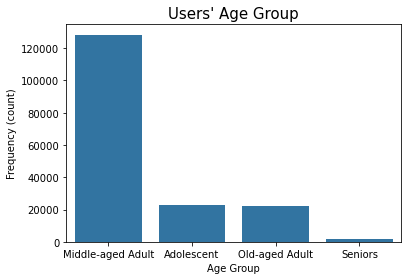

In [23]:
type_count = bikes['age_group'].value_counts()
type_order = type_count.index
base_color = sb.color_palette()[0]
sb.countplot(data = bikes, x = 'age_group', color = base_color, order = type_order)
plt.xlabel('Age Group')
plt.ylabel('Frequency (count)')
plt.title('Users\' Age Group', fontsize = 15)
plt.show()

The classification of the different age group is given:
- Child: 0 - 14 years
- Adolescent: 15 - 24 years
- Middle-aged Adult: 25 - 44 years
- Old-aged Adult: 46 - 64 years
- Seniors: 65 years and above

For the age group distribution, the majority of bikers are middle-aged with over 120,000 riders with both adolescents and old-aged adults following in a distant with about 20,000 riders respectively. This is to be expected as the middle-aged adult tend to be more adventurous. There are no children riders with very few seniors represented.

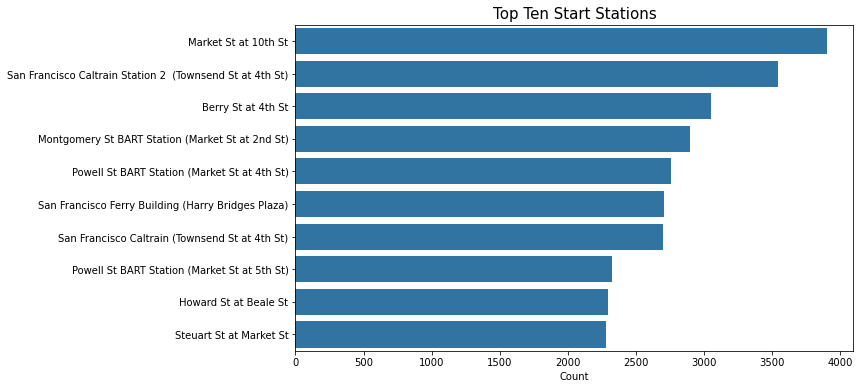

In [24]:
fav_start = bikes.start_station_name.value_counts().head(10)
plt.figure(figsize=(10,6))
sb.barplot(y=fav_start.index, x= fav_start, data=bikes, color=base_color, orient='h')
plt.xlabel('Count')
plt.title('Top Ten Start Stations', fontsize = 15);

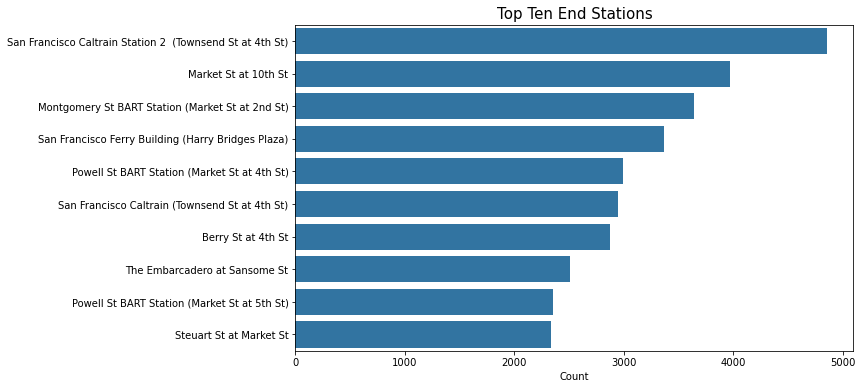

In [25]:
fav_end = bikes.end_station_name.value_counts().head(10)
plt.figure(figsize=(10,6))
sb.barplot(y=fav_end.index, x= fav_end, data=bikes, color=base_color, orient='h')
plt.xlabel('Count')
plt.title('Top Ten End Stations', fontsize = 15);

The top two stations for origin and destination are Market St and San Francisco Caltrain Station 2. The complete distribution cannot be captured properly as there're over 320 different stations covered.

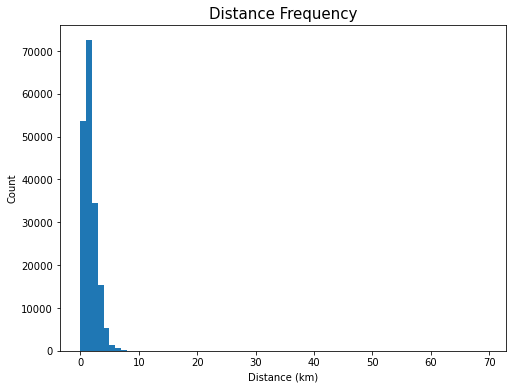

In [26]:
plt.figure(figsize=(8, 6))
plt.hist(data=bikes, x='distance', bins= 70)
plt.xlabel('Distance (km)')
plt.ylabel('Count')
plt.title('Distance Frequency', fontsize = 15)
plt.show()

In [27]:
# Checking for outliers and dropping
print(bikes[bikes.distance > 20])
bikes = bikes[bikes.distance <= 20]

        duration_sec start_time                end_time start_station_id  \
112038          6945        2pm 2019-02-12 16:24:30.158             21.0   

                                      start_station_name  \
112038  Montgomery St BART Station (Market St at 2nd St)   

        start_station_latitude  start_station_longitude end_station_id  \
112038               37.789625              -122.400811          300.0   

            end_station_name  end_station_latitude  end_station_longitude  \
112038  Palm St at Willow St             37.317298            -121.884995   

       bike_id   user_type  member_birth_year member_gender  \
112038    4780  Subscriber             1985.0        Female   

       bike_share_for_all_trip   distance   age          age_group start_day  
112038                      No  69.469241  34.0  Middle-aged Adult   Tuesday  


The distance distribution has an outlier of ~69.5km which only took about 11mins to complete the trip. Going that distance is impossible, and such this would be dropped.

The distribution will be plotted with new values.

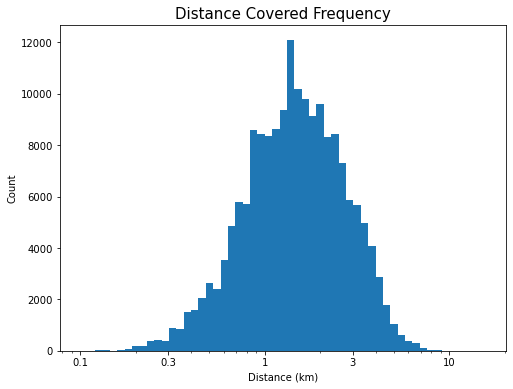

In [28]:
plt.figure(figsize=(8, 6))
bin_size = 0.04
bin= 10 ** np.arange(-1, np.log10(bikes['distance'].max())+bin_size, bin_size)
plt.hist(data=bikes, x='distance', bins=bin)
plt.xscale('log')
#plt.yscale('log')
plt.xticks([0.1, 0.3, 1, 3, 1e1], ['0.1', '0.3', '1', '3', '10'])
plt.xlabel('Distance (km)')
plt.ylabel('Count')
plt.title('Distance Covered Frequency', fontsize = 15);

The distance covered in kilometers during the bike trip has a long_tail, right skew distribution. When plotted on a log scale, the distance distribution is a roughly unimodal distribution and looks a little like a normal distribution with its peak value around 1.0-2.0km.

It is noteworthy to check for a correlation or relationship between distance covered and duration taken as it is expected that the farther the trip is, the longer the trip should be.

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration of rides in seconds took on a wide range of values and was subsequently transformed using a log scale. After transformation, the duration was unimodal with its peak value around 500-800 seconds and having a normal distribution.

The distance covered in kilometers also took on a wide range of values and was plotted on a log scale, the distance distribution is a roughly unimodal distribution and looks a little like a normal distribution with its peak value around 1.0-2.0km.

Surprisingly, weekends have the least rides originating during the period as against expectation. Most rides occurred on weekday specifically on Thursdays and Tuesdays with both having avove 30,000 rides.

## Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating distance, an outlier of 69km ride in about 11 minutes was not practical and was dropped due to this reason.

## Bivariate Exploration

    This section will begin by looking at the pairwise relationship between features.

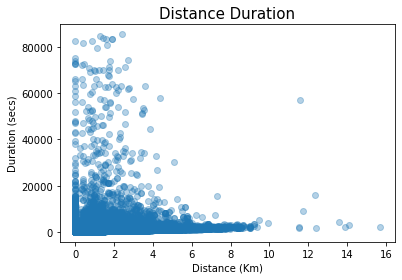

In [29]:
plt.scatter(data = bikes, x = 'distance', y = 'duration_sec', alpha=1/3);
plt.xlabel('Distance (Km)')
plt.ylabel('Duration (secs)')
plt.title('Distance Duration', fontsize = 15)
plt.show()

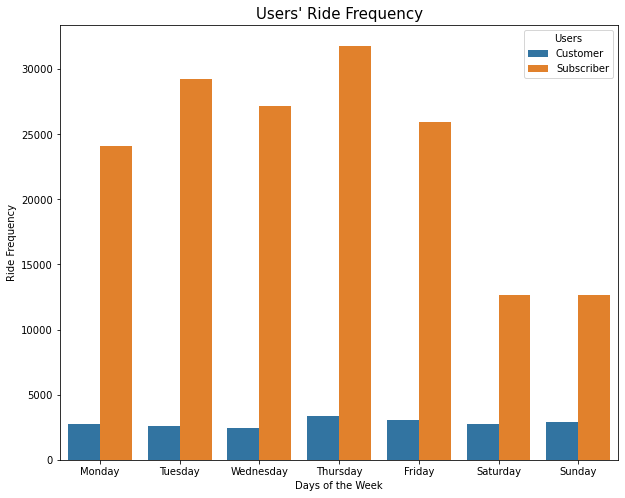

In [30]:
plt.figure(figsize=[10,8])
sb.countplot(data = bikes, x = 'start_day', hue = 'user_type', order = day_order)
plt.xlabel('Days of the Week')
plt.ylabel('Ride Frequency')
plt.title('Users\' Ride Frequency', fontsize = 15)
plt.legend(title = 'Users' )

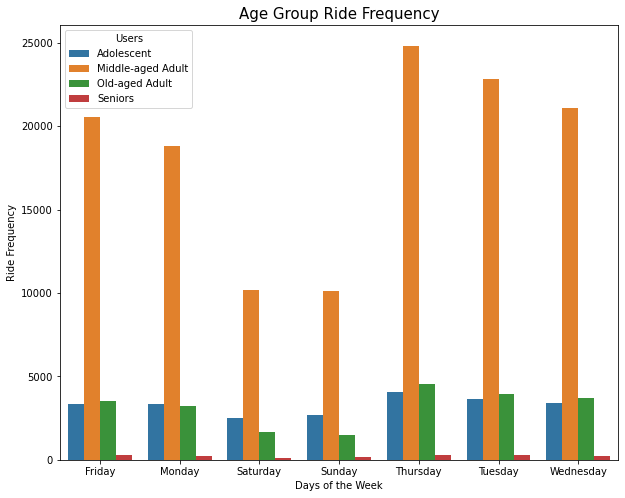

In [31]:
plt.figure(figsize=[10,8])
sb.countplot(data = bikes, x = 'start_day', hue = 'age_group')
plt.xlabel('Days of the Week')
plt.ylabel('Ride Frequency')
plt.title('Age Group Ride Frequency', fontsize = 15)
plt.legend(title = 'Users' )

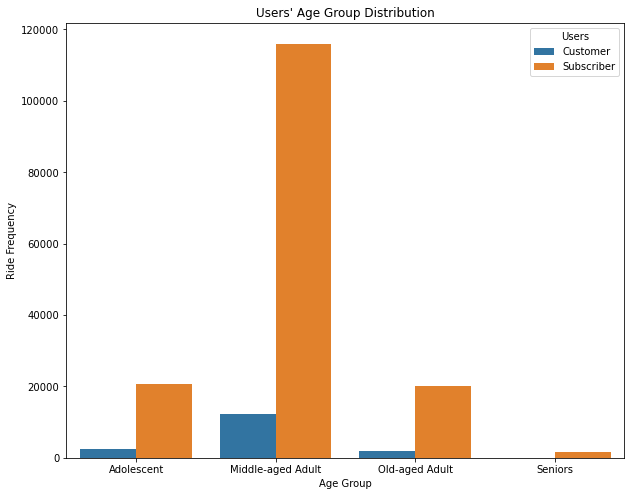

In [32]:
plt.figure(figsize=[10,8])
sb.countplot(data = bikes, x = 'age_group', hue = 'user_type')
plt.xlabel('Age Group')
plt.ylabel('Ride Frequency')
plt.title('Users\' Age Group Distribution')
plt.legend(title = 'Users' )

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From the above analysis,it seems clear that long  distant rides were rarely taken. Most of the rides are of short distances with short durations. Which lies in the range of under 30000 secs and 9 Kms.

Most of the trips were taken by Middle-aged Adult(25 - 44yrs) which was on Thurdays and Tuesdays. Seniors(65+ yrs) took the least trips in all days of the week.



## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

A large number of trips were taken by Subscribers, while Customers tend to take trips are lot less. Trips were taken everyday but Thursdays and Tuesdays stood out with Middle-aged Adult that are Subsribers going on alot of bike trips. Suprisingly, Middle-aged Adult didn't go on trips on weekends(Saturdays and Sundays). 

Also, the difference in the number of rides on Weekends between Scubsribers and Customers are much less compared to Weekdays.

## Multivariate Exploration

  This is section show plots of three or more varaiables to investigate the data further

<Figure size 720x720 with 0 Axes>

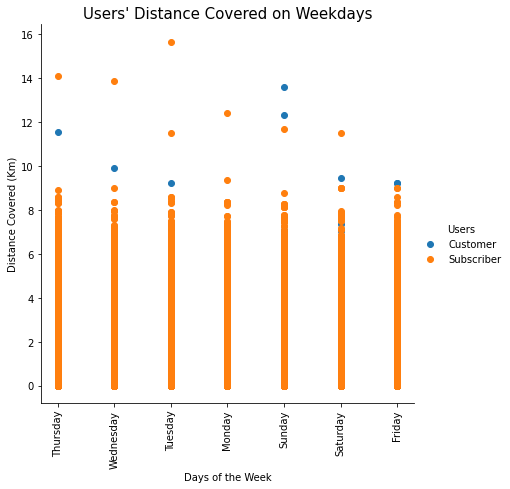

In [33]:
plt.figure(figsize=[10,10])
g = sb.FacetGrid(data = bikes, hue = 'user_type', height = 6)
g.map(plt.scatter, 'start_day', 'distance')
plt.xticks(rotation=90)
plt.xlabel('Days of the Week')
plt.ylabel('Distance Covered (Km)')
plt.title('Users\' Distance Covered on Weekdays', fontsize = 15)
g.add_legend(title = 'Users')
plt.show()

 This plot the shows distance travelled by Users on weekdays. It's clear to see that majority of the Subscriber's trip was around 9Kms everyday with the farthest been around 14-16Kms on Thursdays and Tuesdays. Customers covered the farthest distance of 12-14Kms on Sundays.

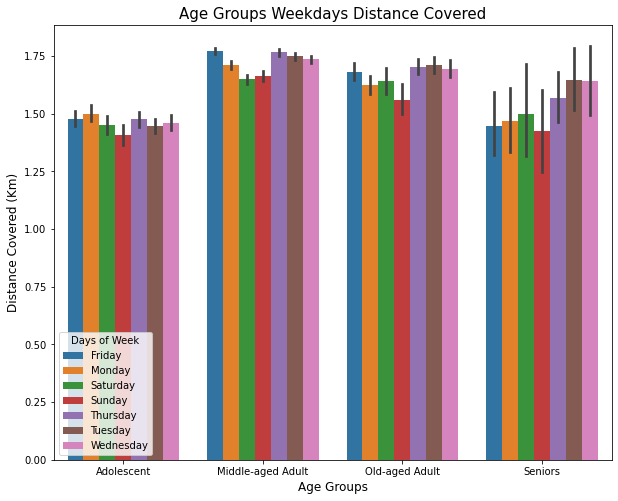

In [34]:
plt.figure(figsize=[10,8])
ax = sb.barplot(data = bikes, x = 'age_group', y = 'distance', hue = 'start_day')
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('Distance Covered (Km)', fontsize=12)
plt.title('Age Groups Weekdays Distance Covered', fontsize=15)
plt.legend(title = 'Days of Week')


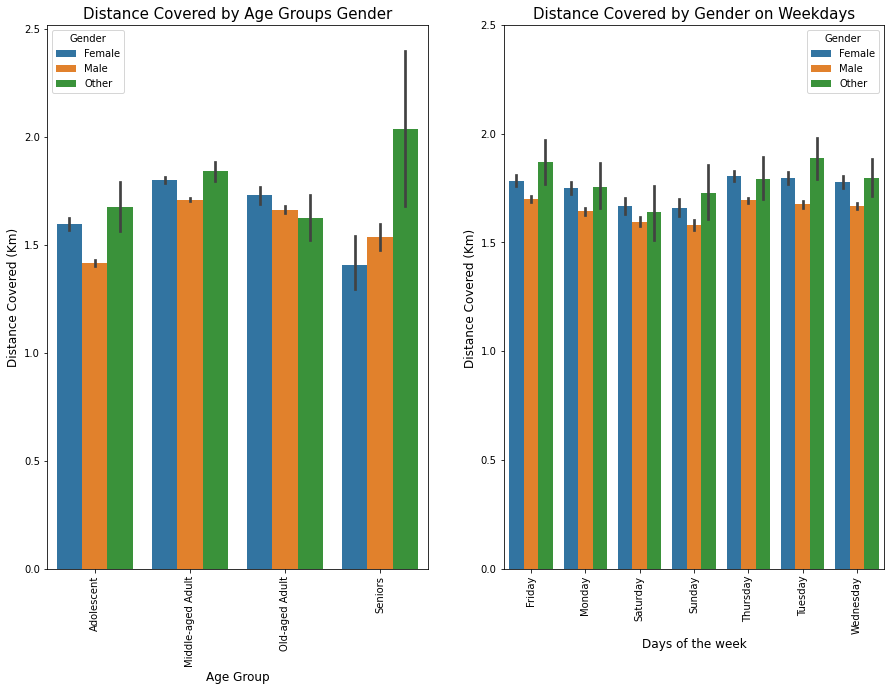

In [35]:
plt.figure(figsize=[15,10])

plt.subplot(1, 2, 1)
ax = sb.barplot(data = bikes, x = 'age_group', y = 'distance', hue = 'member_gender')
plt.xticks(rotation=90)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Distance Covered (Km)', fontsize=12)
plt.title('Distance Covered by Age Groups Gender', fontsize=15)
plt.legend(title = 'Gender')

plt.subplot(1, 2, 2)
ax = sb.barplot(data = bikes, x = 'start_day', y = 'distance', hue = 'member_gender')
plt.xticks(rotation=90)
plt.xlabel('Days of the week', fontsize=12)
plt.ylabel('Distance Covered (Km) ', fontsize=12)
plt.title('Distance Covered by Gender on Weekdays', fontsize=15)
plt.legend(title = 'Gender')
plt.ylim((0,2.5))
plt.show();

Plot 1 shows the relatonships between distance, age group and gender. Suprisingly, it shows that seniors with gender type 'other' travelled farthest. Across all age groups, Middle-aged Adult males and females travelled farthest.

Plot 2 shows the relationship between distance, weekdays and gender. On weekdays especially Fridays and Tuesdays, other travelled the farthest which is suprising because I thought Male will travel the farthest. 

Let's dive deeper for more insight.

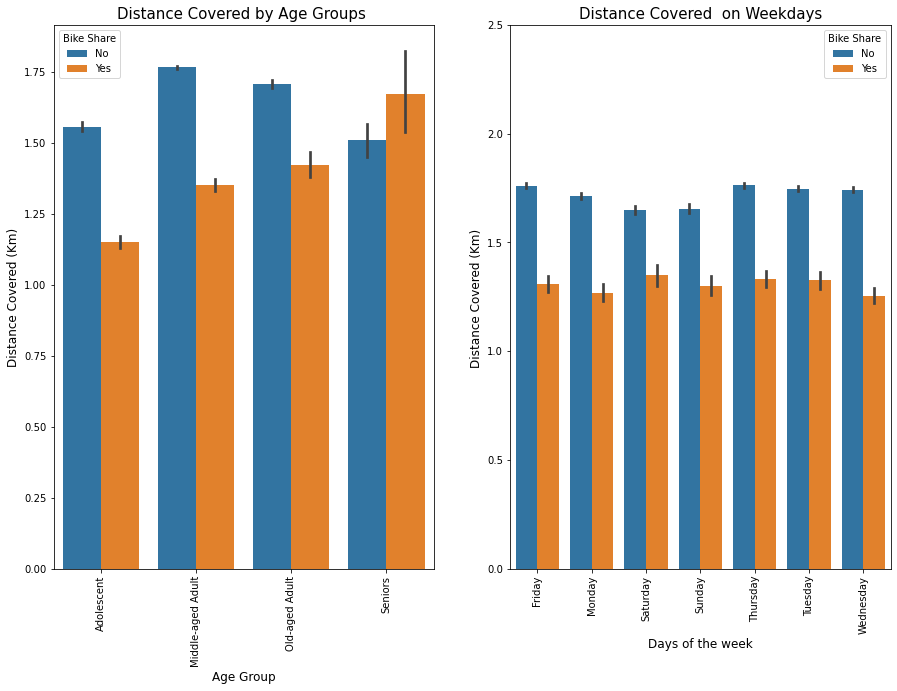

In [36]:
plt.figure(figsize=[15,10])

plt.subplot(1, 2, 1)
ax = sb.barplot(data = bikes, x = 'age_group', y = 'distance', hue = 'bike_share_for_all_trip')
plt.xticks(rotation=90)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Distance Covered (Km)', fontsize=12)
plt.title('Distance Covered by Age Groups ', fontsize=15)
plt.legend(title = 'Bike Share')

plt.subplot(1, 2, 2)
ax = sb.barplot(data = bikes, x = 'start_day', y = 'distance', hue = 'bike_share_for_all_trip')
plt.xticks(rotation=90)
plt.xlabel('Days of the week', fontsize=12)
plt.ylabel('Distance Covered (Km) ', fontsize=12)
plt.title('Distance Covered  on Weekdays', fontsize=15)
plt.legend(title = 'Bike Share')
plt.ylim((0,2.5))
plt.show();

Plot 1 shows the relationships between distance, age group and bike sharing. Seniors shared more than the other age groups which explained by they travelled farthest in the above plot.

## Were there any interesting or surprising interactions between features?

It was Suprising to note that seniors with gender type 'other' travelled farthest and the distance covered by Customers were between 9-14Km everday. 

## Conclusions

I was able discover different trends and uncover insights when i analysed FordGo Bike dataset. Most of the trips travelled for 500-800 seconds per ride with a frequency of more than 12,000. Most riders are male accounting for over 120,000 rides which is more than double the female and other gender combined. I also discovered that 89.2% of rides were from subscribers, while just 10.8% were customers paying daily.

Suprisingly, I discovered more than 20,000 bike trips were taken at 8am and 5pm on Tuesdays and Thursdays. The time of the day is when the weather is expected to be cooler and conducive for relaxation and riding.The majority of users are middle-aged adult with over 120,000 rides with both adolescents and old-aged adults following in distance with about 20,000 riders respectively. This is to be expected as the middle-aged adult tend to be more adventurous. From my analysis, I was able to note that long  distant rides were rarely taken. Most of the rides are of short distances with short durations. Which lies in the range of under 30000 secs and 9 Kms. Also, most of the trips were taken by Middle-aged Adult(25 - 44yrs) which was on Thurdays and Tuesdays. Seniors(65+ yrs) took the least trips in all days of the week.

